In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['good economy', 'Apple customer', 'inflation', 'game price', 'Internet', 'Apple stock', 'clock', 'gasoline', 'bus']

start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
X = df.resample("Q").mean()

In [10]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
scaler = StandardScaler()

In [13]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [14]:
from sklearn.linear_model import Lasso
import numpy as np

In [15]:
lasso = Lasso(alpha=0.05)

In [16]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.05)

In [17]:
coefficients = lasso.coef_
coefficients

array([ 0.04949207,  0.08946733,  0.06207345,  0.14767495, -0.12024969,
        0.02777316, -0.        , -0.        ,  0.        ])

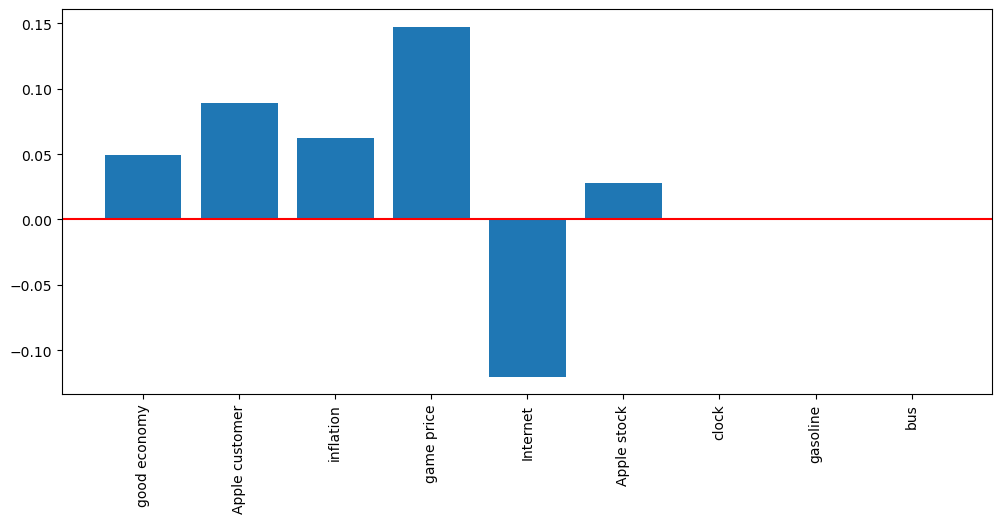

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns, rotation='vertical')
plt.axhline(0, color="red")
plt.show()


In [19]:
lasso1 = Lasso(alpha=0.5)

In [20]:
lasso1.fit(X_scaled, y)

Lasso(alpha=0.5)

In [21]:
coefficients1 = lasso1.coef_
coefficients1

array([ 0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.])

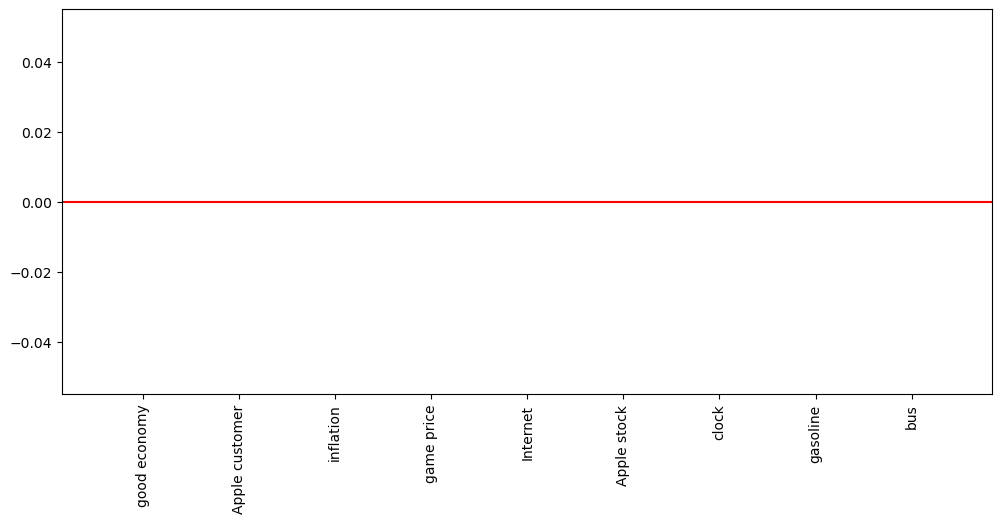

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients1)), coefficients1)
plt.xticks(range(len(coefficients1)), X.columns, rotation='vertical')
plt.axhline(0, color="red")
plt.show()


# 5.) Do these coefficient magnitudes make sense?

According to above graphs, if we run a Lasso with a lambda of 0.5, all the coefficients are showing zero, which might be caused by high level of lambda. Then, we run a Lasso with a lambda of 0.05, we can see coefficients.

Yes. These coefficient magnitudes make sense. Variables including good economy, Apple customer, inflation, game price, and Appple stock have positive coefficients, which imply that an increase in these terms is associated with higher EPS. Variable including Internet has negative coefficient since Internet provides more choices, which will negatively affect EPS. In addition, terms such as clock, gasoline, and bus have zero coefficient, indicating they do not contribute to predicting the EPS.